In [31]:
import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt
import missingno as msno
%matplotlib inline
import re

In [32]:
df = pd.read_csv("./job_skills.csv", delimiter=';',)

In [33]:
df.head()

,Company,Title,Category,Location,Responsibilities,Minimum Qualifications,Preferred Qualifications
0,Google,Google Cloud Program Manager,Program Management,Singapore,"Shape, shepherd, ship, and show technical prog...",BA/BS degree or equivalent practical experienc...,Experience in the business technology market a...
1,Google,"Supplier Development Engineer (SDE), Cable/Con...",Manufacturing & Supply Chain,"Shanghai, China",Drive cross-functional activities in the suppl...,BS degree in an Engineering discipline or equi...,"BSEE, BSME or BSIE degree.\nExperience of usin..."
2,Google,"Data Analyst, Product and Tools Operations, Go...",Technical Solutions,"New York, NY, United States",Collect and analyze data to draw insight and i...,"Bachelor’s degree in Business, Economics, Stat...",Experience partnering or consulting cross-func...
3,Google,"Developer Advocate, Partner Engineering",Developer Relations,"Mountain View, CA, United States","Work one-on-one with the top Android, iOS, and...",BA/BS degree in Computer Science or equivalent...,"Experience as a software developer, architect,..."
4,Google,"Program Manager, Audio Visual (AV) Deployments",Program Management,"Sunnyvale, CA, United States",Plan requirements with internal customers.\nPr...,BA/BS degree or equivalent practical experienc...,CTS Certification.\nExperience in the construc...


## ANÁLISE DE MISSING VALUES

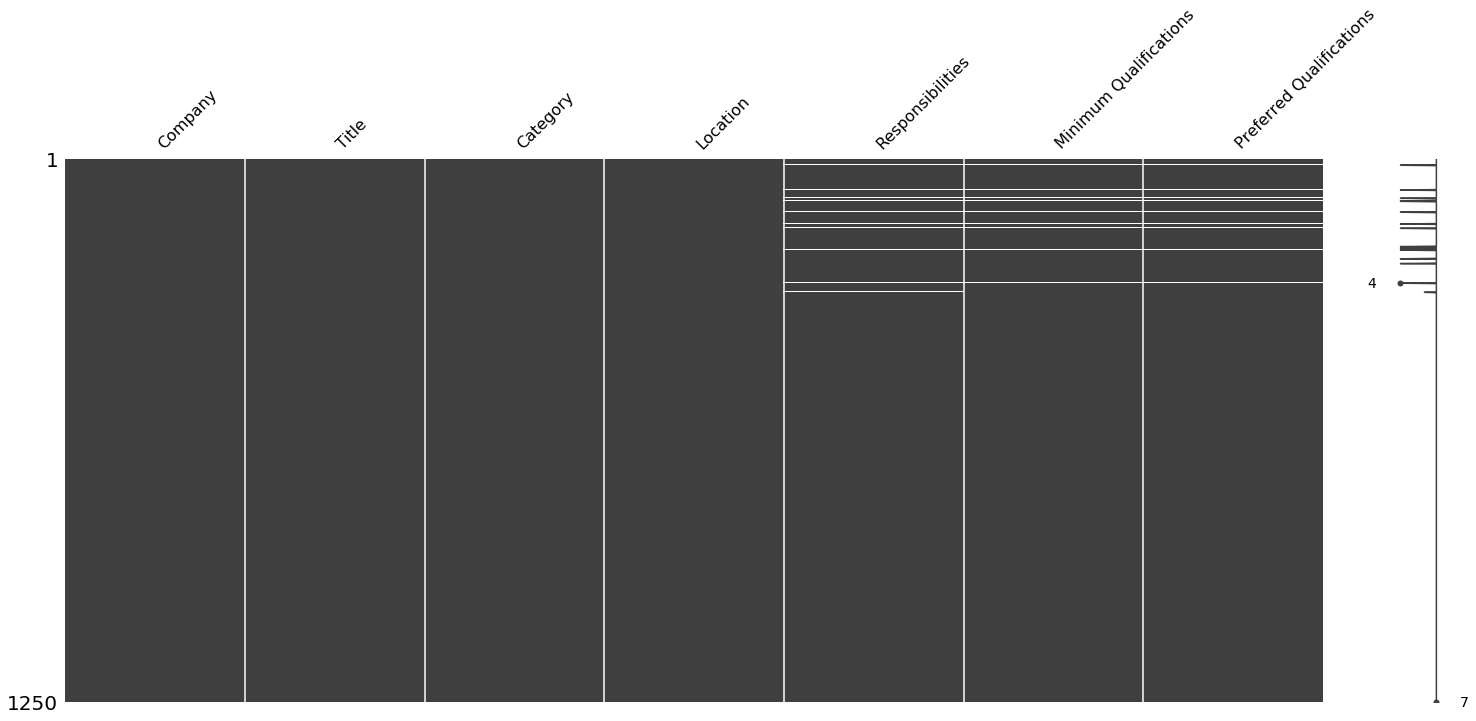

In [34]:
_ = msno.matrix(df)

In [35]:
df.isnull().sum(axis=0)

Company                      0
Title                        0
Category                     0
Location                     0
Responsibilities            15
Minimum Qualifications      14
Preferred Qualifications    14
dtype: int64

In [36]:
df = df.dropna(how='any',axis='rows')

## PAÍSES COM MAIS VAGAS

In [37]:
countries = []
for lines in df['Location']:
    country = lines.split(',')
#     country = lines.split('-')
    countries.append(country[-1].strip())
countries1 = []
for lines in countries:
    country = lines.split('-')
    countries1.append(country[-1].strip())
df['Country'] = countries1

In [38]:
df['Country'].value_counts()

United States           624
Ireland                  87
United Kingdom           62
Germany                  53
Singapore                41
China                    38
Australia                35
Japan                    31
Taiwan                   30
India                    28
Switzerland              22
France                   20
Brazil                   15
Poland                   11
Israel                   11
Mexico                   11
South Korea               9
Hong Kong                 9
Canada                    8
Russia                    8
Sweden                    7
Netherlands               7
Italy                     6
Argentina                 5
Indonesia                 5
Colombia                  5
Norway                    5
Thailand                  4
Turkey                    4
Romania                   3
Finland                   3
Philippines               3
South Africa              3
Belgium                   3
United Arab Emirates      2
Denmark             

In [39]:
## Mudar USA para United States

country_names = []
for name in df['Country']:
    if name == 'USA':
        name = 'United States'
    country_names.append(name)
df['Country'] = country_names

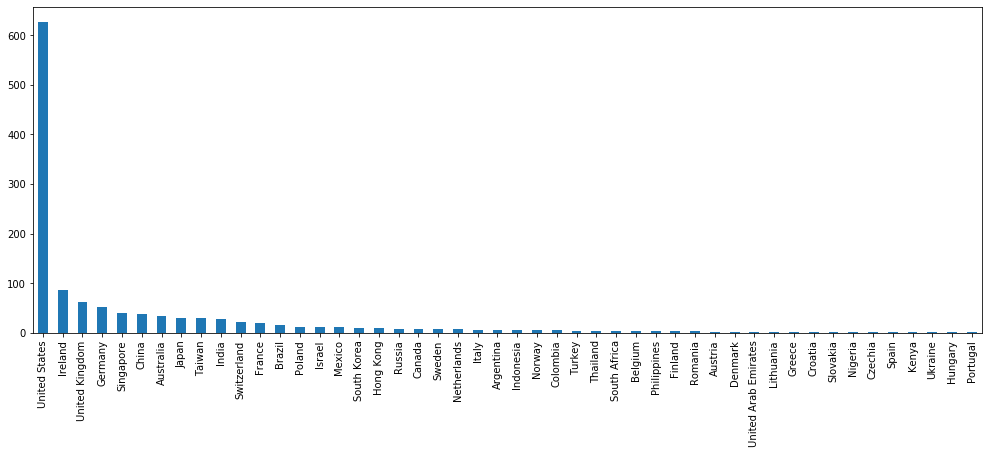

In [40]:
plt.figure(figsize=(17,6))
df['Country'].value_counts().plot(kind='bar')

In [41]:
df.head(5)

,Company,Title,Category,Location,Responsibilities,Minimum Qualifications,Preferred Qualifications,Country
0,Google,Google Cloud Program Manager,Program Management,Singapore,"Shape, shepherd, ship, and show technical prog...",BA/BS degree or equivalent practical experienc...,Experience in the business technology market a...,Singapore
1,Google,"Supplier Development Engineer (SDE), Cable/Con...",Manufacturing & Supply Chain,"Shanghai, China",Drive cross-functional activities in the suppl...,BS degree in an Engineering discipline or equi...,"BSEE, BSME or BSIE degree.\nExperience of usin...",China
2,Google,"Data Analyst, Product and Tools Operations, Go...",Technical Solutions,"New York, NY, United States",Collect and analyze data to draw insight and i...,"Bachelor’s degree in Business, Economics, Stat...",Experience partnering or consulting cross-func...,United States
3,Google,"Developer Advocate, Partner Engineering",Developer Relations,"Mountain View, CA, United States","Work one-on-one with the top Android, iOS, and...",BA/BS degree in Computer Science or equivalent...,"Experience as a software developer, architect,...",United States
4,Google,"Program Manager, Audio Visual (AV) Deployments",Program Management,"Sunnyvale, CA, United States",Plan requirements with internal customers.\nPr...,BA/BS degree or equivalent practical experienc...,CTS Certification.\nExperience in the construc...,United States


In [42]:
from country_list import countries_for_language

In [43]:
## Biblioteca para pegar os códigos de cada país
countries = dict(countries_for_language('en'))
## Inversão do dict
inv_map = {v: k for k, v in countries.items()}

In [44]:
input_countries = df['Country']
countries = {}
codes = [inv_map.get(country, 'Unknown code') for country in input_countries]

In [45]:
df['Code'] = codes

In [46]:
df[df['Code'] == 'Unknown code']

,Company,Title,Category,Location,Responsibilities,Minimum Qualifications,Preferred Qualifications,Country,Code
314,Google,Programmatic Account Manager,Sales & Account Management,Hong Kong,Build and maintain strong ownership regarding ...,BA/BS degree or equivalent practical experienc...,Solid hands-on experience with the DoubleClick...,Hong Kong,Unknown code
397,Google,"Mobile UX Lead, Large Customer Sales (English,...",Sales & Account Management,Hong Kong,Manage the mobile search book of business of a...,BA/BS degree or equivalent practical experienc...,Experience working and advising customers on t...,Hong Kong,Unknown code
611,Google,"Head of Field Marketing (North Asia), Google C...",Marketing & Communications,Hong Kong,"Hire, lead and align the Regional Marketing an...",BA/BS degree or equivalent practical experienc...,Experience in Computer Science or development....,Hong Kong,Unknown code
760,Google,MBA Intern 2018,Administrative,Hong Kong,Intern projects will be determined based on th...,Must be a first year student in a two year ful...,Work experience prior to the MBA program in Sa...,Hong Kong,Unknown code
770,Google,"Content Policy Manager, Asia Pacific (Full-tim...",Marketing & Communications,Hong Kong,Develop and support Google’s external-facing c...,Bachelor's degree or equivalent practical expe...,Direct experience in content policy matters.\n...,Hong Kong,Unknown code
934,Google,MBA Intern 2018,Administrative,Hong Kong,Intern projects will be determined based on th...,Must be a first year student in a two year ful...,Work experience prior to the MBA program in Sa...,Hong Kong,Unknown code
1028,Google,MBA Intern 2018,Administrative,Hong Kong,Intern projects will be determined based on th...,Must be a first year student in a two year ful...,Work experience prior to the MBA program in Sa...,Hong Kong,Unknown code
1205,Google,MBA Intern 2018,Administrative,Hong Kong,Intern projects will be determined based on th...,Must be a first year student in a two year ful...,Work experience prior to the MBA program in Sa...,Hong Kong,Unknown code
1222,Google,"Cluster Manager, Security (English, Chinese)",Real Estate & Workplace Services,Hong Kong,Assist with implementing performance of corpor...,BA/BS degree or equivalent practical experienc...,Experience conducting investigations including...,Hong Kong,Unknown code


In [47]:
df.loc[df['Code'] == 'Unknown code', 'Code'] = 'HK'

In [48]:
## Biblioteca para transformar o código alpha_2 para alpha_3

import pycountry
input_countries = df['Code']

countries = {}
for country in pycountry.countries:
    countries[country.alpha_2] = country.alpha_3

codes = [countries.get(country, 'Unknown code') for country in input_countries]

In [49]:
df['Code'] = codes

In [50]:
df_code = df.groupby(['Country','Code']).size().reset_index(name='Jobs').sort_values(by='Jobs',ascending=False)

In [51]:
df_code

,Country,Code,Jobs
47,United States,USA,626
19,Ireland,IRL,87
46,United Kingdom,GBR,62
13,Germany,DEU,53
34,Singapore,SGP,41
6,China,CHN,38
1,Australia,AUS,35
22,Japan,JPN,31
41,Taiwan,TWN,30
17,India,IND,28


In [52]:
import chart_studio.plotly as py
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

In [53]:
init_notebook_mode(connected=True)

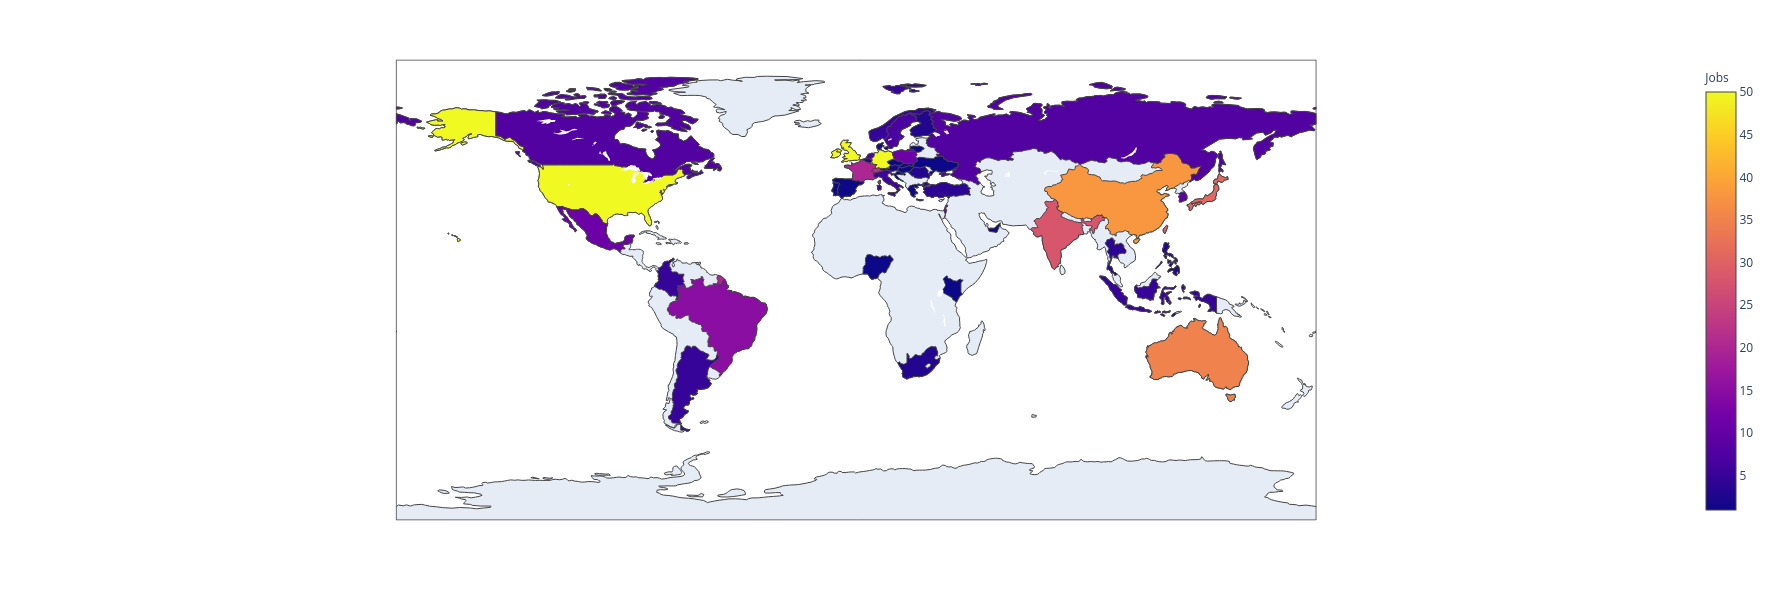

In [54]:
import plotly.express as px

fig = px.choropleth(df_code, locations="Code",
                    color="Jobs", # lifeExp is a column of gapminder
#                     colorscale = colorscale,
                    range_color = [1,50],
                    hover_name="Country", # column to add to hover information
                    color_continuous_scale=px.colors.sequential.Plasma)
fig.show()

## REMOÇÃO DE STOPWORDS, ACENTOS E TOKENIZAÇÃO

In [55]:
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize
import string
  
stopwords = stopwords.words("english")
punctuation = string.punctuation

def preprocessing(string):
    token = string.replace('\n', ' ').split()
    nopunc = [word for word in string if word not in punctuation]
    string_nopunc = ''.join(nopunc)
    clean_message = [word for word in word_tokenize(string_nopunc) if word not in stopwords]
    return clean_message

In [56]:
teste = "this is a test, string, and i am testing if this,. shit\nworks"

In [57]:
preprocessing(teste)

['test', 'string', 'testing', 'shit', 'works']

In [58]:
all_lines = ''
for lines in df['Minimum Qualifications']:
    all_lines += lines + ' '
preprocessing(all_lines)

['BABS',
 'degree',
 'equivalent',
 'practical',
 'experience',
 '3',
 'years',
 'experience',
 'program',
 'andor',
 'project',
 'management',
 'cloud',
 'computing',
 'enterprise',
 'software',
 'andor',
 'marketing',
 'technologies',
 'BS',
 'degree',
 'Engineering',
 'discipline',
 'equivalent',
 'practical',
 'experience',
 '7',
 'years',
 'experience',
 'CableConnector',
 'Design',
 'Manufacturing',
 'NPI',
 'role',
 'Experience',
 'working',
 'Interconnect',
 'Engineering',
 'Product',
 'Design',
 'PDMechanical',
 'Engineer',
 'developing',
 'manufacturing',
 'testing',
 'Ability',
 'speak',
 'write',
 'English',
 'Mandarin',
 'fluently',
 'idiomatically',
 'Bachelor',
 '’',
 'degree',
 'Business',
 'Economics',
 'Statistics',
 'Operations',
 'Research',
 'related',
 'analytical',
 'field',
 'equivalent',
 'practical',
 'experience',
 '2',
 'years',
 'work',
 'experience',
 'business',
 'analysis',
 '1',
 'year',
 'experience',
 'statistical',
 'modeling',
 'forecasting',
 'mach

## PALAVRAS MAIS FREQUENTES PARA AS QUALIFICAÇÕES MÍNIMAS GERAIS

In [59]:
from nltk.probability import FreqDist
fdist = FreqDist()

for words in preprocessing(all_lines):
    fdist[words.lower()] += 1

fdist.most_common(20)

[('experience', 3032),
 ('equivalent', 1062),
 ('degree', 1057),
 ('practical', 992),
 ('babs', 829),
 ('years', 722),
 ('management', 397),
 ('ability', 362),
 ('field', 339),
 ('working', 310),
 ('related', 309),
 ('program', 299),
 ('2018', 291),
 ('english', 285),
 ('speak', 280),
 ('fluently', 279),
 ('idiomatically', 277),
 ('write', 275),
 ('science', 275),
 ('andor', 260)]

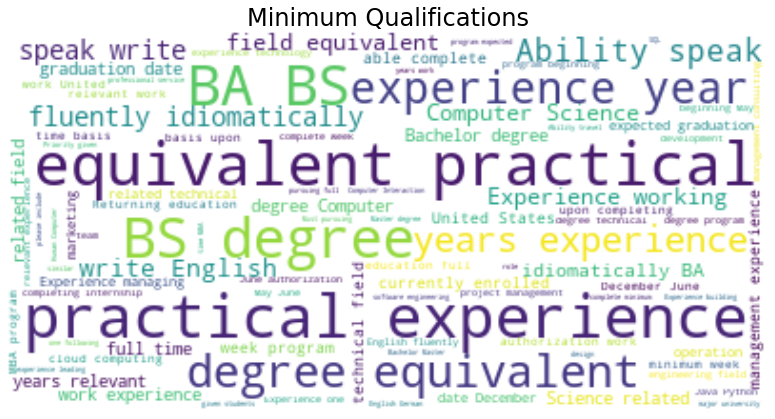

In [61]:
from wordcloud import WordCloud, ImageColorGenerator

wordcloud = WordCloud(background_color="white").generate(all_lines)
plt.figure(figsize=(18,7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.margins(x=0, y=0)
plt.title('Minimum Qualifications',size=24)
plt.show()

## LINGUAGENS DE PROGRAMAÇÃO MAIS EXIGIDAS

In [62]:
program_languages = ['Python', 'Java ','C#', 'PHP', 'Javascript', 'Ruby', 'Matlab', 'SQL','Go', 'C++', 'Node', 'R']
Languages = {}
for lang in program_languages:
    Languages[lang] = all_lines.count(lang)

In [63]:
Languages

{'Python': 97,
 'Java ': 10,
 'C#': 15,
 'PHP': 7,
 'Javascript': 3,
 'Ruby': 14,
 'Matlab': 4,
 'SQL': 85,
 'Go': 105,
 'C++': 54,
 'Node': 11,
 'R': 262}

## VALOR DE R CORRIGIDO COM REGEX

In [64]:
numTimes = re.findall('\s+\(*R\.*\,*\)*(?![a-zA-Z0-9])',all_lines)
Languages['R'] = len(numTimes)

In [65]:
Languages

{'Python': 97,
 'Java ': 10,
 'C#': 15,
 'PHP': 7,
 'Javascript': 3,
 'Ruby': 14,
 'Matlab': 4,
 'SQL': 85,
 'Go': 105,
 'C++': 54,
 'Node': 11,
 'R': 35}

In [66]:
# x = 0
# for lines in preprocessing(all_lines):
#     if lines == 'R':
#         x += 1

In [69]:
#import gensim.downloader as api

In [70]:
#word_vectors = api.load("glove-wiki-gigaword-100")  # load pre-trained word-vectors from gensim-data

In [71]:
#word_vectors.most_similar('python',topn=20)

In [72]:
df.head()

,Company,Title,Category,Location,Responsibilities,Minimum Qualifications,Preferred Qualifications,Country,Code
0,Google,Google Cloud Program Manager,Program Management,Singapore,"Shape, shepherd, ship, and show technical prog...",BA/BS degree or equivalent practical experienc...,Experience in the business technology market a...,Singapore,SGP
1,Google,"Supplier Development Engineer (SDE), Cable/Con...",Manufacturing & Supply Chain,"Shanghai, China",Drive cross-functional activities in the suppl...,BS degree in an Engineering discipline or equi...,"BSEE, BSME or BSIE degree.\nExperience of usin...",China,CHN
2,Google,"Data Analyst, Product and Tools Operations, Go...",Technical Solutions,"New York, NY, United States",Collect and analyze data to draw insight and i...,"Bachelor’s degree in Business, Economics, Stat...",Experience partnering or consulting cross-func...,United States,USA
3,Google,"Developer Advocate, Partner Engineering",Developer Relations,"Mountain View, CA, United States","Work one-on-one with the top Android, iOS, and...",BA/BS degree in Computer Science or equivalent...,"Experience as a software developer, architect,...",United States,USA
4,Google,"Program Manager, Audio Visual (AV) Deployments",Program Management,"Sunnyvale, CA, United States",Plan requirements with internal customers.\nPr...,BA/BS degree or equivalent practical experienc...,CTS Certification.\nExperience in the construc...,United States,USA


## QUALIDADES MAIS IMPORTANTES PARA CADA CATEGORIA

In [73]:
fdist = FreqDist()

prog_mgt_qual = ''
for lines in df[df['Category'] == 'Program Management']['Preferred Qualifications']:
    prog_mgt_qual += lines + ' '
    prog_mgt_qual = prog_mgt_qual.replace('\n',' ')
for lines in df[df['Category'] == 'Program Management']['Minimum Qualifications']:
    prog_mgt_qual += lines + ' '
    prog_mgt_qual = prog_mgt_qual.replace('\n',' ')
    
    
for words in preprocessing(prog_mgt_qual):
    fdist[words.lower()] += 1

fdist.most_common(20)

[('experience', 372),
 ('ability', 128),
 ('management', 122),
 ('years', 93),
 ('degree', 86),
 ('technical', 76),
 ('skills', 70),
 ('equivalent', 67),
 ('practical', 63),
 ('cloud', 61),
 ('partner', 54),
 ('business', 50),
 ('programs', 50),
 ('software', 48),
 ('working', 46),
 ('andor', 45),
 ('engineering', 43),
 ('babs', 40),
 ('strong', 37),
 ('work', 33)]

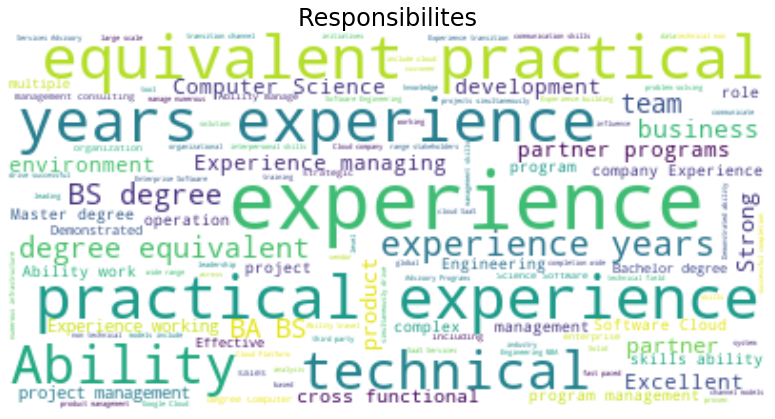

In [74]:
wordcloud = WordCloud(background_color="white").generate(prog_mgt_qual)
plt.figure(figsize=(18,7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.margins(x=0, y=0)
plt.title('Responsibilites',size=24)
plt.show()

In [75]:
fdist = FreqDist()

manuf_qual = ''
for lines in df[df['Category'] == 'Manufacturing & Supply Chain']['Preferred Qualifications']:
    manuf_qual += lines + ' '
    manuf_qual = manuf_qual.replace('\n',' ')
for lines in df[df['Category'] == 'Manufacturing & Supply Chain']['Minimum Qualifications']:
    manuf_qual += lines + ' '
    manuf_qual = manuf_qual.replace('\n',' ')
    
for words in preprocessing(manuf_qual):
    fdist[words.lower()] += 1

fdist.most_common(20)

[('experience', 109),
 ('engineering', 42),
 ('management', 34),
 ('supply', 32),
 ('chain', 32),
 ('years', 29),
 ('working', 26),
 ('equivalent', 21),
 ('teams', 19),
 ('ability', 18),
 ('degree', 16),
 ('sourcing', 15),
 ('skills', 14),
 ('practical', 14),
 ('manufacturing', 13),
 ('related', 13),
 ('travel', 13),
 ('consumer', 13),
 ('product', 13),
 ('operations', 13)]

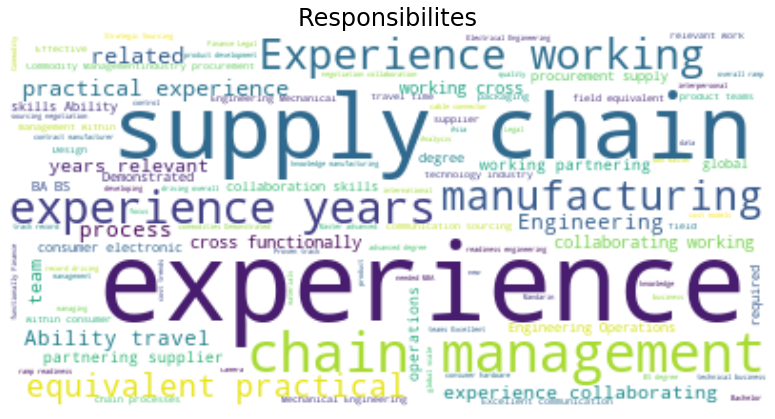

In [76]:
wordcloud = WordCloud(background_color="white").generate(manuf_qual)
plt.figure(figsize=(18,7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.margins(x=0, y=0)
plt.title('Responsibilites',size=24)
plt.show()

In [77]:
fdist = FreqDist()

tech_qual = ''
for lines in df[df['Category'] == 'Technical Solutions']['Preferred Qualifications']:
    tech_qual += lines + ' '
    tech_qual = tech_qual.replace('\n',' ')
for lines in df[df['Category'] == 'Technical Solutions']['Minimum Qualifications']:
    tech_qual += lines + ' '
    tech_qual = tech_qual.replace('\n',' ')
    
for words in preprocessing(tech_qual):
    fdist[words.lower()] += 1

fdist.most_common(20)

[('experience', 606),
 ('technical', 197),
 ('ability', 196),
 ('data', 137),
 ('degree', 136),
 ('cloud', 131),
 ('related', 130),
 ('working', 124),
 ('equivalent', 124),
 ('management', 110),
 ('science', 110),
 ('computer', 102),
 ('systems', 101),
 ('field', 99),
 ('technologies', 98),
 ('practical', 96),
 ('skills', 90),
 ('solutions', 88),
 ('andor', 88),
 ('engineering', 84)]

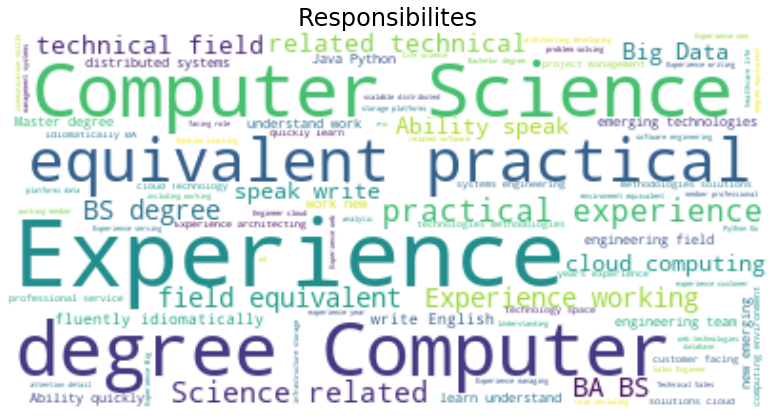

In [78]:
wordcloud = WordCloud(background_color="white").generate(tech_qual)
plt.figure(figsize=(18,7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.margins(x=0, y=0)
plt.title('Responsibilites',size=24)
plt.show()

## TESTE COM LEMMATIZER

In [79]:
import nltk
from nltk.stem import WordNetLemmatizer 

# Init the Wordnet Lemmatizer
lemmatizer = WordNetLemmatizer()

In [80]:
lemmatized_output = ' '.join([lemmatizer.lemmatize(w) for w in preprocessing(all_lines)])

print(lemmatized_output)

BABS degree equivalent practical experience 3 year experience program andor project management cloud computing enterprise software andor marketing technology BS degree Engineering discipline equivalent practical experience 7 year experience CableConnector Design Manufacturing NPI role Experience working Interconnect Engineering Product Design PDMechanical Engineer developing manufacturing testing Ability speak write English Mandarin fluently idiomatically Bachelor ’ degree Business Economics Statistics Operations Research related analytical field equivalent practical experience 2 year work experience business analysis 1 year experience statistical modeling forecasting machine learning Experience R SAS Python 1 year experience developing manipulating large datasets BABS degree Computer Science equivalent practical experience Experience working directly partner Programming experience one following languagesplatforms Android Java Kotlin iOS Javascript BABS degree equivalent practical expe

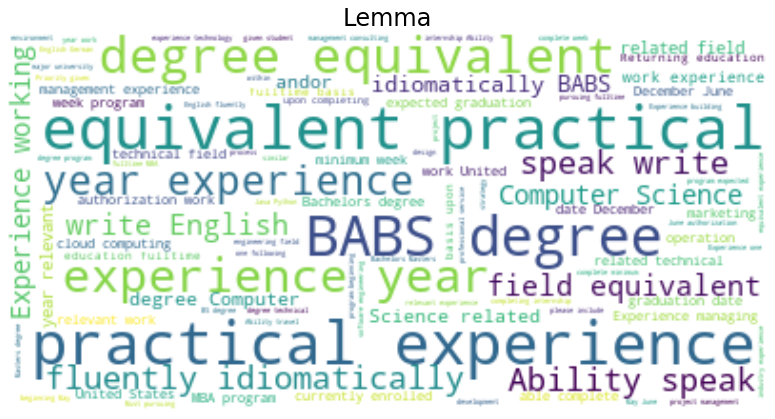

In [81]:
wordcloud = WordCloud(background_color="white").generate(lemmatized_output)
plt.figure(figsize=(18,7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.margins(x=0, y=0)
plt.title('Lemma',size=24)
plt.show()

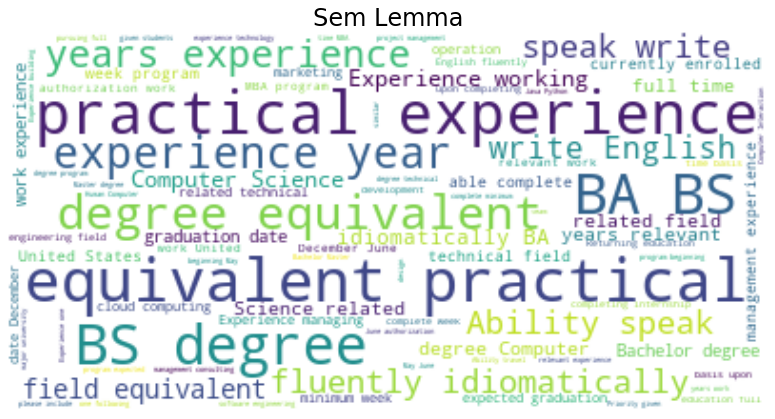

In [82]:
wordcloud = WordCloud(background_color="white").generate(all_lines)
plt.figure(figsize=(18,7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.margins(x=0, y=0)
plt.title('Sem Lemma',size=24)
plt.show()